In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [53]:
x_data = np.random.randn(2000,3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2
noise = np.random.randn(1,2000)*0.2

In [54]:
y_data = np.matmul(w_real, x_data.T) + b_real + noise

Text(0, 0.5, '$y$')

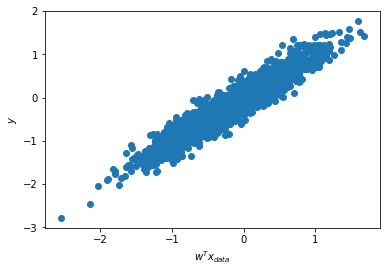

In [55]:
plt.scatter(np.matmul(w_real, x_data.T) + b_real, y_data)
plt.xlabel(r'$w^{T}x_{data}$')
plt.ylabel('$y$')

In [60]:
NUM_STEPS = 20
g = tf.Graph()
wb_=[]

In [61]:
with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
    
    with tf.name_scope('train') as scope:
        learning_rate = 0.1
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)
        
    init = tf.global_variables_initializer() 
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data}) 
            if(step%5==0):
                print(step, sess.run([w,b])) 
                wb_.append(sess.run([w,b]))
        print(10, sess.run([w,b]))

0 [array([[0.29603398, 0.4849241 , 0.10249002]], dtype=float32), -0.19732922]
5 [array([[0.30867365, 0.49712425, 0.10018912]], dtype=float32), -0.2052688]
10 [array([[0.30867362, 0.49712425, 0.10018913]], dtype=float32), -0.20526882]
15 [array([[0.30867362, 0.49712425, 0.10018913]], dtype=float32), -0.20526882]
10 [array([[0.30867362, 0.49712425, 0.10018913]], dtype=float32), -0.20526882]
